In [7]:
import tensorflow as tf
from tensorflow import keras
from sklearn.manifold import TSNE
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.layers import Dense, Activation, Flatten

In [8]:
from keras.datasets import fashion_mnist
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()


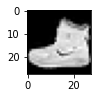

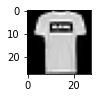

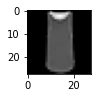

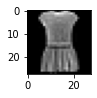

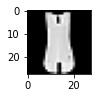

In [9]:
for i in range(5):  
  plt.subplot(330 + 1 + i)
  plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
  plt.show()

In [10]:
alexnet = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2),padding='same'),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2),padding='same'),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2),padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [11]:
alexnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 5, 5, 96)          11712     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 96)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 256)         614656    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 2, 2, 256)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 2, 2, 384)         885120    
                                                                 
 conv2d_8 (Conv2D)           (None, 2, 2, 384)        

In [12]:
train_y = tf.keras.utils.to_categorical(train_y, num_classes=10)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=10)

In [13]:
from sklearn.model_selection import train_test_split
train_X, X_val, train_y, y_val = train_test_split(train_X, train_y, test_size=0.2, random_state=1)

In [14]:
hist=[]
results=[]

In [15]:
from keras.optimizers import SGD,Adam

opt_list=[SGD(lr=0.01, momentum=0.9),Adam(lr=0.001)]
epochs_list = [5,10,15]
for optimizer in  opt_list:
  for epoch in epochs_list:

    alexnet.compile(optimizer=optimizer, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
    history = alexnet.fit(
      train_X,
      train_y,
      batch_size=64,
      epochs=epoch,
      validation_data=(X_val, y_val)
    )
    hist.append(history.history)
    results.append(alexnet.evaluate(test_X, test_y, batch_size=128))

Epoch 1/5


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


750/750 [==============================] - 19s 13ms/step - loss: 0.8322 - accuracy: 0.6938 - val_loss: 0.6157 - val_accuracy: 0.7952
Epoch 2/5
750/750 [==============================] - 10s 13ms/step - loss: 0.5377 - accuracy: 0.8092 - val_loss: 0.4820 - val_accuracy: 0.8298
Epoch 3/5
750/750 [==============================] - 10s 13ms/step - loss: 0.4727 - accuracy: 0.8322 - val_loss: 0.4845 - val_accuracy: 0.8305
Epoch 4/5
750/750 [==============================] - 10s 13ms/step - loss: 0.4360 - accuracy: 0.8434 - val_loss: 0.4393 - val_accuracy: 0.8413
Epoch 5/5
79/79 [==============================] - 1s 7ms/step - loss: 0.4347 - accuracy: 0.8451
Epoch 1/10
750/750 [==============================] - 11s 14ms/step - loss: 0.3808 - accuracy: 0.8626 - val_loss: 0.4048 - val_accuracy: 0.8569
Epoch 2/10
750/750 [==============================] - 10s 14ms/step - loss: 0.3676 - accuracy: 0.8650 - val_loss: 0.3835 - val_accuracy: 0.8597
Epoch 3/10
750/750 [==============================] -

In [16]:
hist

[{'loss': [0.8322179913520813,
   0.5377291440963745,
   0.47270673513412476,
   0.4359871447086334,
   0.4025457501411438],
  'accuracy': [0.6937500238418579,
   0.809208333492279,
   0.8321874737739563,
   0.843416690826416,
   0.8532500267028809],
  'val_loss': [0.6157169342041016,
   0.48196080327033997,
   0.4844772219657898,
   0.439276784658432,
   0.4081647992134094],
  'val_accuracy': [0.7951666712760925,
   0.8297500014305115,
   0.8305000066757202,
   0.8412500023841858,
   0.8532500267028809]},
 {'loss': [0.38079655170440674,
   0.36764004826545715,
   0.3479090929031372,
   0.3360244929790497,
   0.3227006494998932,
   0.31874701380729675,
   0.30495887994766235,
   0.2962251901626587,
   0.28625673055648804,
   0.2781715393066406],
  'accuracy': [0.862625002861023,
   0.8649583458900452,
   0.8718541860580444,
   0.874916672706604,
   0.8793958425521851,
   0.8801458477973938,
   0.8861874938011169,
   0.8900625109672546,
   0.8932291865348816,
   0.8941875100135803],
  '

In [17]:
results

[[0.4346608519554138, 0.8450999855995178],
 [0.39266693592071533, 0.870199978351593],
 [0.43793985247612, 0.8689000010490417],
 [0.6905240416526794, 0.8562999963760376],
 [0.6026971936225891, 0.8684999942779541],
 [0.5085741877555847, 0.8467000126838684]]

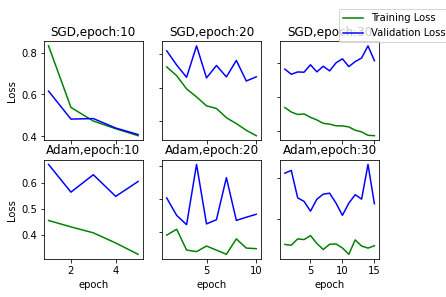

In [20]:
fig, axs = plt.subplots(2, 3)
epoch1=range(1,6)
epoch2 = range(1,11)
epoch3 = range(1,16)


axs[0, 0].set_title('SGD,epoch:10')
axs[0, 0].plot(epoch1,hist[0]['loss'],color="green",label="Training Loss")
axs[0, 0].plot(epoch1,hist[0]['val_loss'],color="blue",label = "Validation Loss")

axs[0, 1].set_title('SGD,epoch:20')
axs[0, 1].plot(epoch2,hist[1]['loss'],color="green")
axs[0, 1].plot(epoch2,hist[1]['val_loss'],color="blue")

axs[0, 2].set_title('SGD,epoch:30')
axs[0, 2].plot(epoch3,hist[2]['loss'],color="green")
axs[0, 2].plot(epoch3,hist[2]['val_loss'],color="blue")

axs[1, 0].set_title('Adam,epoch:10')
axs[1, 0].plot(epoch1,hist[3]['loss'],color="green")
axs[1, 0].plot(epoch1,hist[3]['val_loss'],color="blue")

axs[1, 1].set_title('Adam,epoch:20')
axs[1, 1].plot(epoch2,hist[4]['loss'],color="green")
axs[1, 1].plot(epoch2,hist[4]['val_loss'],color="blue")


axs[1, 2].set_title('Adam,epoch:30')
axs[1, 2].plot(epoch3,hist[5]['loss'],color="green")
axs[1, 2].plot(epoch3,hist[5]['val_loss'],color="blue")
  

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='Loss')

fig.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

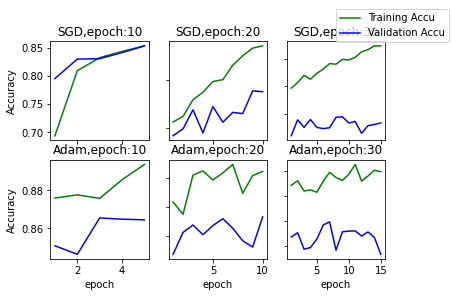

In [22]:
fig, axs = plt.subplots(2, 3)
epoch1=range(1,6)
epoch2 = range(1,11)
epoch3 = range(1,16)
axs[0, 0].set_title('SGD,epoch:10')
axs[0, 0].plot(epoch1,hist[0]['accuracy'],color="green",label="Training Accu")
axs[0, 0].plot(epoch1,hist[0]['val_accuracy'],color="blue",label = "Validation Accu")

axs[0, 1].set_title('SGD,epoch:20' )
axs[0, 1].plot(epoch2,hist[1]['accuracy'],color="green")
axs[0, 1].plot(epoch2,hist[1]['val_accuracy'],color="blue")

axs[0, 2].set_title('SGD,epoch:30')
axs[0, 2].plot(epoch3,hist[2]['accuracy'],color="green")
axs[0, 2].plot(epoch3,hist[2]['val_accuracy'],color="blue")



axs[1, 0].set_title('Adam,epoch:10')
axs[1, 0].plot(epoch1,hist[3]['accuracy'],color="green")
axs[1, 0].plot(epoch1,hist[3]['val_accuracy'],color="blue")

axs[1, 1].set_title('Adam,epoch:20')
axs[1, 1].plot(epoch2,hist[4]['accuracy'],color="green")
axs[1, 1].plot(epoch2,hist[4]['val_accuracy'],color="blue")


axs[1, 2].set_title('Adam,epoch:30')
axs[1, 2].plot(epoch3,hist[5]['accuracy'],color="green")
axs[1, 2].plot(epoch3,hist[5]['val_accuracy'],color="blue")


for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='Accuracy')
    
fig.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()